In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.mlab as mlab
import math

In [2]:
def GaussFWHM(R_vals, display_label):
    (mu, sigma) = norm.fit(R_vals)
    n, bins, patches = plt.hist(R_vals, density=True, color = "orange", alpha = 0.5)
    xax = np.linspace(bins[0], bins[-1], 1000)
    y = norm.pdf(xax, mu, sigma)
    FWHM = 2.354820045*sigma
    FWHM_coords = [mu-0.5*FWHM, mu+0.5*FWHM]
    plt.plot(xax,y, color = "red")
    plt.axvline(FWHM_coords[0], color = "black")
    plt.axvline(FWHM_coords[1], color = "black")
    plt.title(display_label)
    plt.show()
    
    return(FWHM)

def circles(R1_table, R1_sizes, color):
    for count, value in enumerate(R1_table):
        draw_circle = plt.Circle((value[0], value[1]), 0.5*R1_sizes[count], alpha=0.4, color = color)
        ax.add_artist(draw_circle)

In [3]:

#WITHOUT DELETION: Groups 0, 1, 8, 9, 10, 11 are R4
input_path_R1 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211221_RESI_newVoyager_FusionBT_R1R3_nodel/resi-analysis_2/R1_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"
input_path_R3 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211221_RESI_newVoyager_FusionBT_R1R3_nodel/resi-analysis_2/R3_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"

#WITH DELETION: Groups 0, 1, 8, 9, 10, 11 are R4
#input_path_R1 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211130_RESI_R1-5pr_2del_R3-3pr_R4_single_align/resi-analysis_2/R1_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"
#input_path_R3 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211130_RESI_R1-5pr_2del_R3-3pr_R4_single_align/resi-analysis_2/R3_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"

R1_table = pd.read_hdf(input_path_R1, key = 'locs')
R3_table = pd.read_hdf(input_path_R3, key = 'locs')
R1_table.sort_values(by=['group', 'frame'])
R3_table.sort_values(by=['group', 'frame'])

Minx = min(R1_table["x"].min(), R3_table["x"].min())*130 -5
Miny = max(R1_table["y"].max(), R3_table["y"].max())*130 +5

maxOuter = max(((max(R1_table["x"].max(), R3_table["x"].max())*130)-Minx), (-(min(R1_table["y"].min(), R3_table["y"].min())*130)+Miny)) +5

R1_table["x"] = 130*R1_table["x"]-Minx
R3_table["x"] = 130*R3_table["x"]-Minx
R1_table["y"] = -(130)*R1_table["y"]+Miny
R3_table["y"] = -(130)*R3_table["y"]+Miny

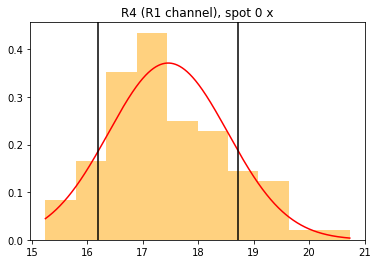

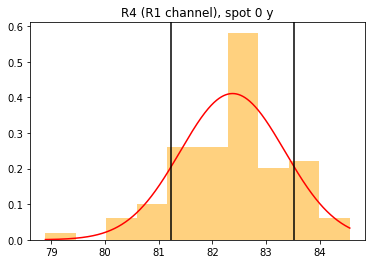

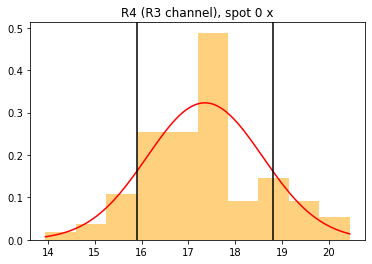

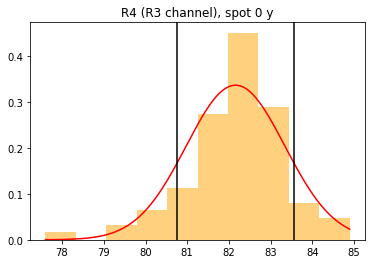

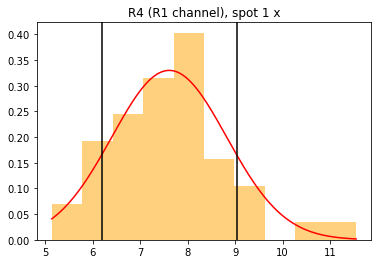

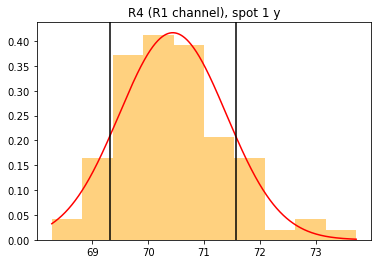

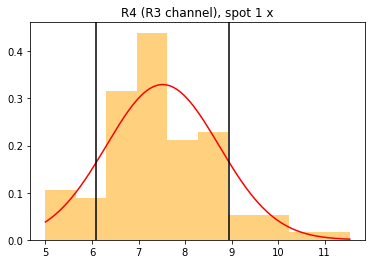

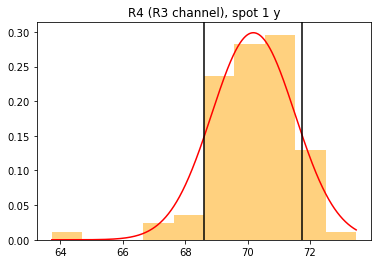

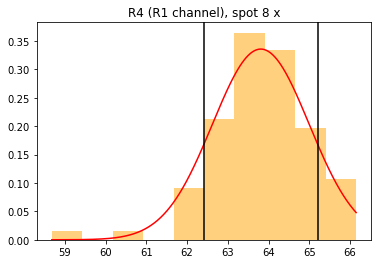

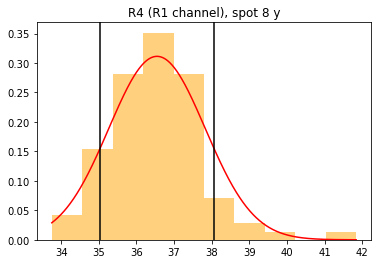

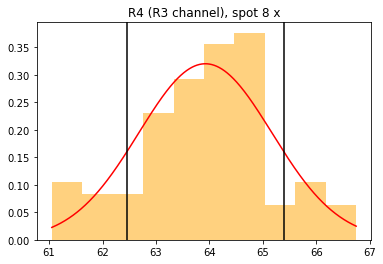

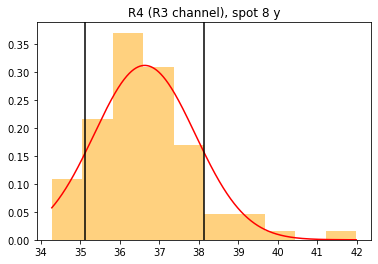

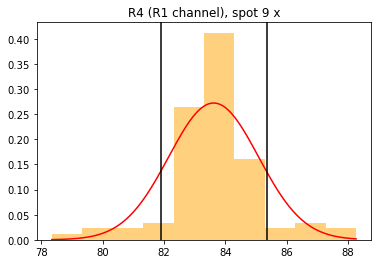

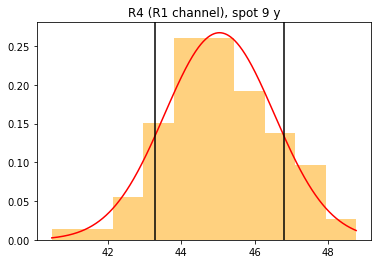

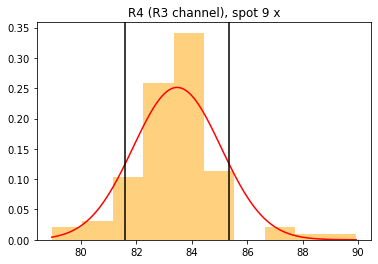

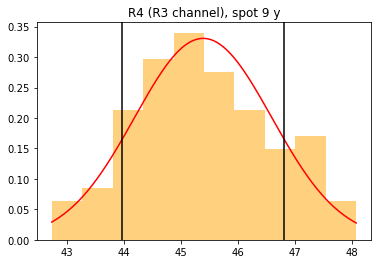

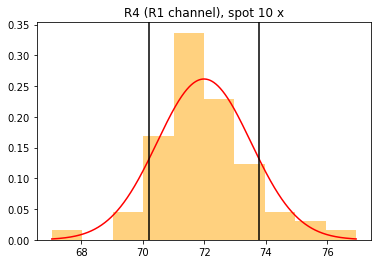

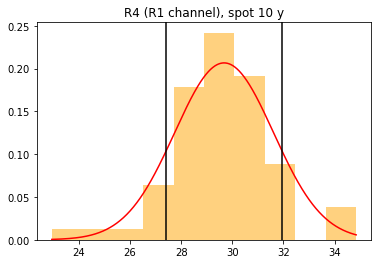

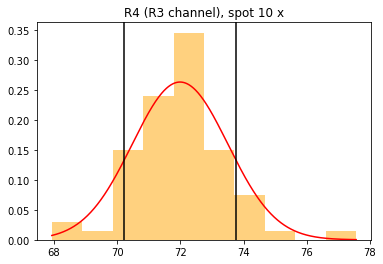

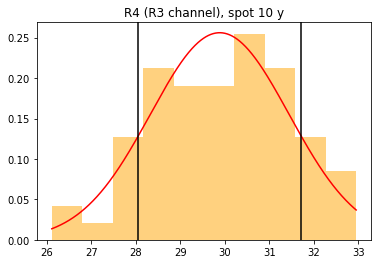

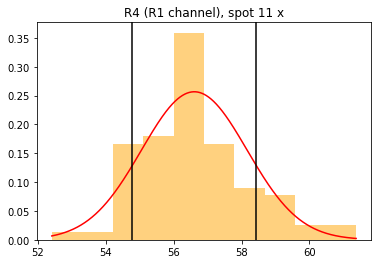

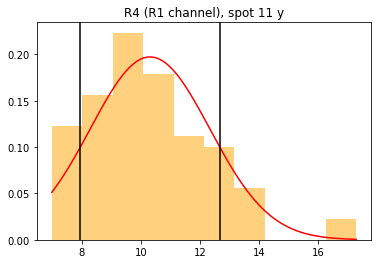

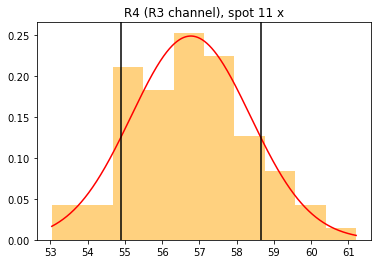

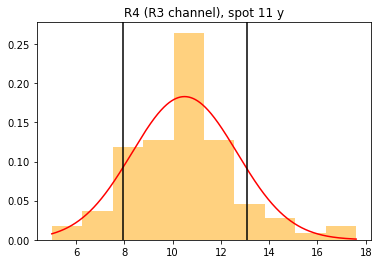

[[ 0.10553932  0.21909332]
 [ 0.09010172  0.25752258]
 [-0.11485672 -0.08600235]
 [ 0.14519501 -0.35147476]
 [ 0.0052948  -0.20373917]
 [-0.16011429 -0.18920612]]
[0.24318806 0.27282998 0.14348683 0.38028423 0.20380796 0.24786194]
[[2.53125369 2.28776447]
 [2.84856851 2.25456498]
 [2.79615735 3.01810243]
 [3.45100561 3.51474873]
 [3.59256417 4.54667803]
 [3.65883065 4.76329342]]
[[2.90974392 2.78603809]
 [2.85181107 3.14436166]
 [2.93698773 3.01064295]
 [3.73698154 2.84078902]
 [3.56344545 3.66838455]
 [3.76900707 5.13590012]]
[2.40950908 2.55156675 2.90712989 3.48287717 4.0696211  4.21106203]
[2.84789101 2.99808636 2.97381534 3.28888528 3.615915   4.4524536 ]
R4 from R1 channel std:  [1.34430395 1.45169828]
R4 from R3 channel std:  [1.40766515 1.4659215 ]


In [4]:
R4_positions_R1_channel = []
R4_std_R1_channel = []
R4_positions_R3_channel = []
R4_std_R3_channel = []
R4_FWHM_R1_channel = []
R4_FWHM_R3_channel = []

for i in (0,1,8,9,10,11):
#for i in (0,1,2,3,10,11):
    R1 = (R1_table[R1_table["group"] == i])
    Avg_R1 = R1["x"].mean(), R1["y"].mean()
    Std_R1 = R1["x"].std(), R1["y"].std()
    
    FWHM_x = GaussFWHM(R1["x"], ("R4 (R1 channel), spot "+str(i)+" x"))
    FWHM_y = GaussFWHM(R1["y"], ("R4 (R1 channel), spot "+str(i)+" y"))
    
    FWHM_R1 = [FWHM_x, FWHM_y]
    
    R3 = (R3_table[R3_table["group"] == i])
    Avg_R3 = R3["x"].mean(), R3["y"].mean()
    Std_R3 = R3["x"].std(), R3["y"].std()
    
    FWHM_x = GaussFWHM(R3["x"], ("R4 (R3 channel), spot "+str(i)+" x"))
    FWHM_y = GaussFWHM(R3["y"], ("R4 (R3 channel), spot "+str(i)+" y"))
    
    FWHM_R3 = [FWHM_x, FWHM_y]
    
    R4_positions_R1_channel.append(Avg_R1)
    R4_std_R1_channel.append(Std_R1)
    R4_FWHM_R1_channel.append(FWHM_R1)
    R4_positions_R3_channel.append(Avg_R3)
    R4_std_R3_channel.append(Std_R3)
    R4_FWHM_R3_channel.append(FWHM_R3)
    
R4_positions_R1_channel = np.asarray(R4_positions_R1_channel)
R4_positions_R3_channel = np.asarray(R4_positions_R3_channel)
R4_std_R1_channel = np.asarray(R4_std_R1_channel)
R4_std_R3_channel = np.asarray(R4_std_R3_channel)
R4_FWHM_R1_channel = np.asarray(R4_FWHM_R1_channel)
R4_FWHM_R3_channel = np.asarray(R4_FWHM_R3_channel)

R4_differences = (R4_positions_R1_channel - R4_positions_R3_channel)

R4_distances = (np.sqrt(R4_differences[:,0]**2 + R4_differences[:,1]**2))

print(R4_differences)
print(R4_distances)

print(R4_FWHM_R1_channel)
print(R4_FWHM_R3_channel)

R4_FWHM_R1_channel_avg = np.mean(R4_FWHM_R1_channel, axis = 1)
R4_FWHM_R3_channel_avg = np.mean(R4_FWHM_R3_channel, axis = 1)

print(R4_FWHM_R1_channel_avg)
print(R4_FWHM_R3_channel_avg)



print("R4 from R1 channel std: ", np.mean(R4_std_R1_channel, axis=0))
print("R4 from R3 channel std: ", np.mean(R4_std_R3_channel, axis=0))

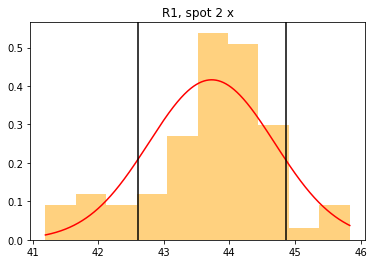

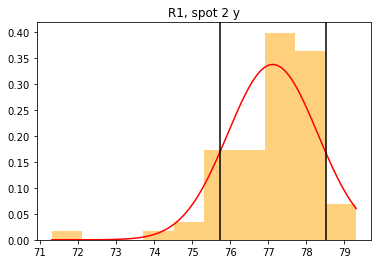

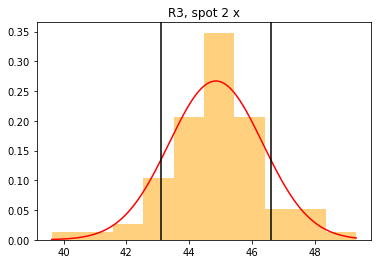

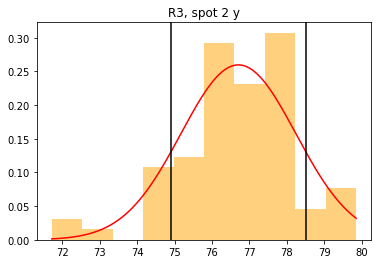

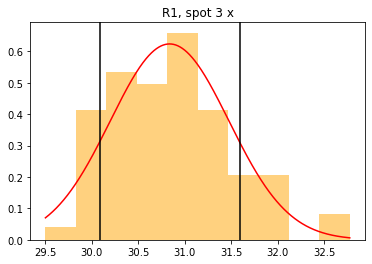

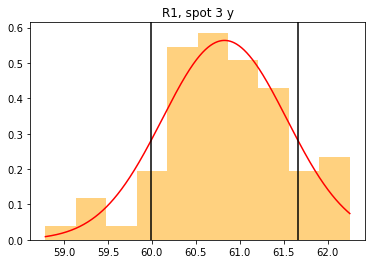

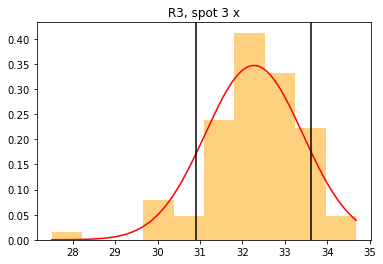

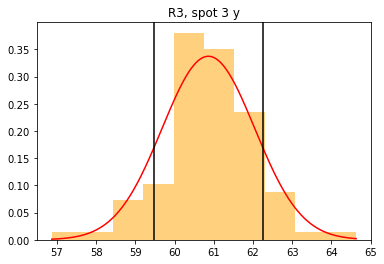

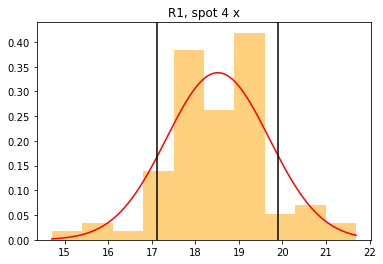

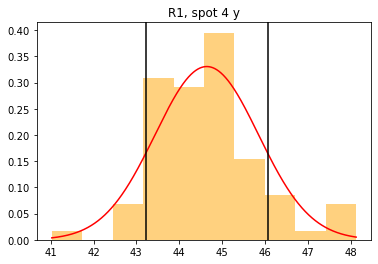

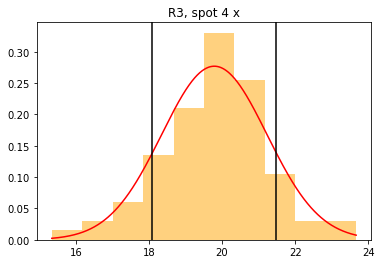

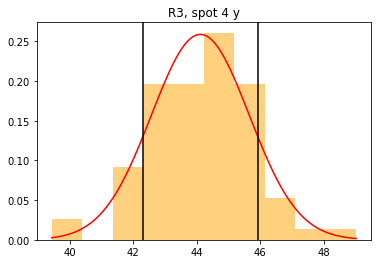

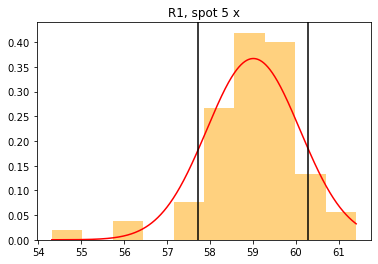

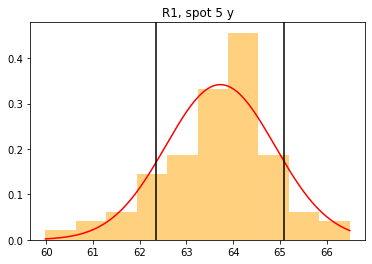

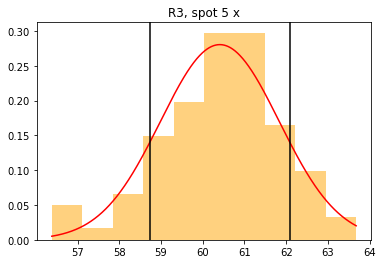

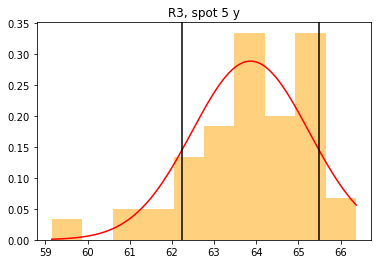

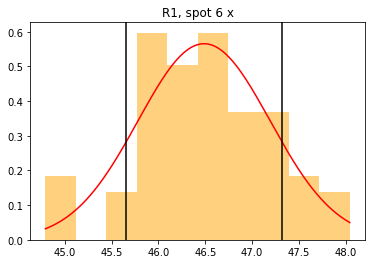

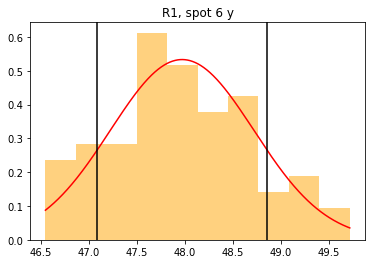

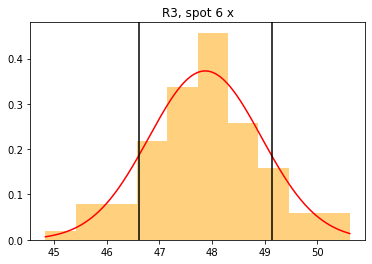

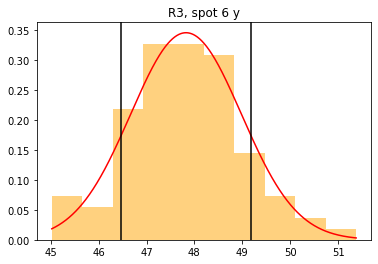

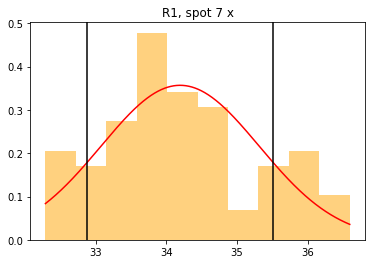

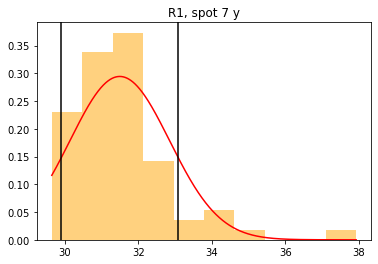

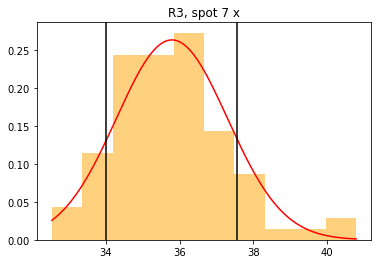

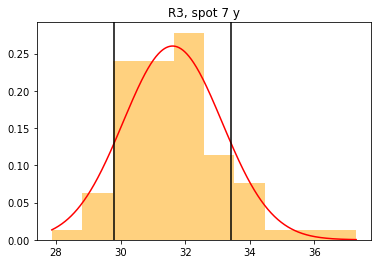

[[-1.12090683  0.4122467 ]
 [-1.43300819 -0.03483582]
 [-1.27166367  0.5317688 ]
 [-1.3986969  -0.13740158]
 [-1.38252258  0.14503479]
 [-1.59502411 -0.10848808]]
[1.19431129 1.43343155 1.37837097 1.40542955 1.39010927 1.59870935]
[[2.25701128 2.77775724]
 [1.50551545 1.66591906]
 [2.78011918 2.84133642]
 [2.56065621 2.74727592]
 [1.66181386 1.76222473]
 [2.63286966 3.19069278]]
[[3.5194847  3.61814782]
 [2.70615518 2.78472714]
 [3.39059207 3.62993145]
 [3.35173727 3.26012378]
 [2.52100305 2.72274552]
 [3.55987109 3.61023695]]
R1 std:  [0.95483633 1.06797478]
R3 std:  [1.35638946 1.39748021]


In [5]:
R1_resi = []
R1_resi_std = []
R3_resi = []
R3_resi_std = []
R1_FWHM = []
R3_FWHM = []

for i in (2,3,4,5,6,7):
#for i in (4,5,6,7,8,9):
    R1 = (R1_table[R1_table["group"] == i])
    Avg_R1 = R1["x"].mean(), R1["y"].mean()
    Std_R1 = R1["x"].std(), R1["y"].std()
    
    FWHM_x = GaussFWHM(R1["x"], ("R1, spot "+str(i)+" x"))
    FWHM_y = GaussFWHM(R1["y"], ("R1, spot "+str(i)+" y"))
    
    FWHM_R1 = [FWHM_x, FWHM_y]
    
    R3 = (R3_table[R3_table["group"] == i])
    Avg_R3 = R3["x"].mean(), R3["y"].mean()
    Std_R3 = R3["x"].std(), R3["y"].std()
    
    FWHM_x = GaussFWHM(R3["x"], ("R3, spot "+str(i)+" x"))
    FWHM_y = GaussFWHM(R3["y"], ("R3, spot "+str(i)+" y"))
    
    FWHM_R3 = [FWHM_x, FWHM_y]
    
    R1_resi.append(Avg_R1)
    R1_resi_std.append(Std_R1)
    R1_FWHM.append(FWHM_R1)
    R3_resi.append(Avg_R3)
    R3_resi_std.append(Std_R3)
    R3_FWHM.append(FWHM_R3)
    
R1_resi = np.asarray(R1_resi)
R3_resi = np.asarray(R3_resi)
R1_resi_std = np.asarray(R1_resi_std)
R3_resi_std = np.asarray(R3_resi_std)
R1_FWHM = np.asarray(R1_FWHM)
R3_FWHM = np.asarray(R3_FWHM)

Resi_differences = (R1_resi - R3_resi)
Resi_distances = (np.sqrt(Resi_differences[:,0]**2 + Resi_differences[:,1]**2))

print(Resi_differences)
print(Resi_distances)

print(R1_FWHM)
print(R3_FWHM)

R1_FWHM_avg = np.mean(R1_FWHM, axis = 1)
R3_FWHM_avg = np.mean(R3_FWHM, axis = 1)

print("R1 std: ", np.mean(R1_resi_std, axis=0))
print("R3 std: ", np.mean(R3_resi_std, axis=0))

'\n#ax.scatter(R1_resi[:,0], R1_resi[:,1], s=(20*representation_factor)**2, color = "red", label = "R1")\nax.scatter(R1_resi[:,0], R1_resi[:,1], s=R1_FWHM_avg, color = "red", label = "R1")\nax.scatter(R3_resi[:,0], R3_resi[:,1], s=R3_FWHM_avg, color = "blue", label = "R3")\n\nax.scatter(R4_positions_R1_channel[:,0], R4_positions_R1_channel[:,1], s=R4_FWHM_R1_channel_avg, color = "maroon", label = "R4 from R1 channel")\nax.scatter(R4_positions_R3_channel[:,0], R4_positions_R3_channel[:,1], s=R4_FWHM_R3_channel_avg, color = "darkblue", label = "R4 from R3 channel")\n'

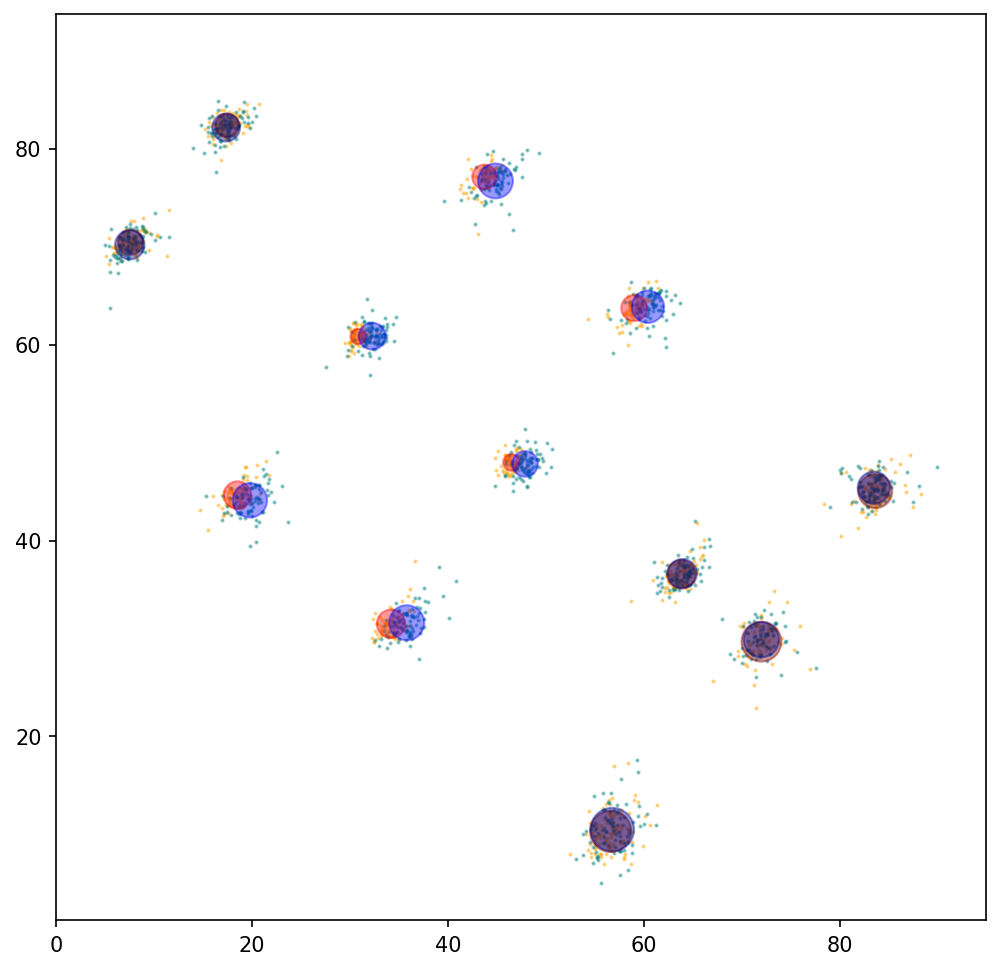

In [6]:
size_inches = 8
dpi = 150

fig, ax = plt.subplots(figsize=(size_inches, size_inches), dpi=dpi)

ax.axis('equal')
ax.set_ylim(0, maxOuter)
ax.set_xlim(0, maxOuter)

#Plot all the RESI cluster centers
ax.scatter(R1_table["x"], R1_table["y"], s=1, alpha=0.4, color = "orange")
ax.scatter(R3_table["x"], R3_table["y"], s=1, alpha=0.4, color = "teal")

circles(R1_resi, R1_FWHM_avg, "red")
circles(R3_resi, R3_FWHM_avg, "blue")

circles(R4_positions_R1_channel, R4_FWHM_R1_channel_avg, "maroon")
circles(R4_positions_R3_channel, R4_FWHM_R3_channel_avg, "darkblue")

#draw_circle = plt.Circle((10,10), 10, alpha=0.5, color = "red") #The third value is the radius
#ax.add_artist(draw_circle)

'''
#ax.scatter(R1_resi[:,0], R1_resi[:,1], s=(20*representation_factor)**2, color = "red", label = "R1")
ax.scatter(R1_resi[:,0], R1_resi[:,1], s=R1_FWHM_avg, color = "red", label = "R1")
ax.scatter(R3_resi[:,0], R3_resi[:,1], s=R3_FWHM_avg, color = "blue", label = "R3")

ax.scatter(R4_positions_R1_channel[:,0], R4_positions_R1_channel[:,1], s=R4_FWHM_R1_channel_avg, color = "maroon", label = "R4 from R1 channel")
ax.scatter(R4_positions_R3_channel[:,0], R4_positions_R3_channel[:,1], s=R4_FWHM_R3_channel_avg, color = "darkblue", label = "R4 from R3 channel")
'''

